<h3>Steps to apply the Q Learning algorithm with an E greedy policy approach. </h3>

<h4>Part 1: Grid construction and Learning process tunning </h4> Obtain the quality value's table of your grid and verify its coherence.

In [1]:
from e_greedy_q_learning import Qlearning, State

1.- Define your grid (2D String List) and grid resources dictionary. Ensure it is respected the structure: {string_symbol: [associated_reward, ends_the_episode], ..., additionalInfo}. Where:
string_symbol: The string of the symbol to which the information of the value's list is associated.
associated: The reward as a float, being positive if suitable or negative if avoidable. 
ends_the_episode: Boolean type; True if stepping into this symbol (state) ends the episode, False otherwise. Label goal and obstacle symbols for plotting purposes.

In the given room example: The fire 'f' is static (potentially avoidable cells). The obstacles are represented as 'o'. Gate, exit or goal of the floor written as 'x'. The empty space is represented as '*'.

In [2]:
grid_resources = {'*': [-1, False], 'f': [-10, False],
                  'x': [100, True], 'obstacle':'o', 'goal': 'x'}


# insert your grid or the needed function to generate it.
grid = [
    ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
    ['o', '*', '*', 'o', '*', '*', '*', 'o', 'o', '*', '*', '*', '*', '*', '*', '*', '*', 'f', '*', '*', 'o'],
    ['o', 'f', '*', 'f', '*', 'o', 'f', '*', 'o', 'f', '*', 'f', '*', 'o', 'f', 'o', '*', 'f', '*', '*', 'o'],
    ['o', '*', '*', 'o', '*', '*', 'f', 'o', '*', '*', '*', 'o', '*', '*', 'f', 'f', '*', 'f', '*', '*', 'o'],
    ['o', 'f', '*', 'f', 'f', '*', 'f', '*', 'o', 'f', '*', 'f', 'f', '*', 'f', '*', '*', 'f', '*', '*', 'o'],
    ['o', '*', '*', '*', '*', '*', '*', 'o', '*', 'f', '*', '*', '*', '*', 'f', 'o', 'f', '*', 'f', '*', 'o'],
    ['o', 'f', 'f', '*', '*', '*', '*', 'o', 'o', 'f', 'f', '*', 'f', '*', '*', '*', 'f', '*', '*', '*', 'o'],
    ['o', 'f', '*', 'f', '*', '*', 'f', '*', 'o', '*', '*', 'f', 'f', '*', 'f', '*', 'f', '*', 'f', '*', 'o'],
    ['o', 'f', '*', 'f', 'f', '*', '*', 'o', '*', '*', '*', 'f', 'f', '*', 'f', 'f', '*', 'f', '*', '*', 'o'],
    ['o', '*', '*', 'o', '*', '*', '*', '*', 'o', '*', '*', 'o', '*', '*', '*', 'o', '*', 'f', '*', '*', 'o'],
    ['o', 'f', '*', 'f', '*', 'o', '*', '*', 'o', 'f', '*', 'f', '*', 'o', 'f', '*', 'f', '*', 'f', '*', 'o'],
    ['o', 'f', '*', 'f', '*', '*', 'f', 'o', '*', '*', '*', 'f', 'f', '*', 'f', 'f', '*', 'f', '*', '*', 'o'],
    ['o', 'f', '*', 'f', 'f', '*', '*', '*', 'o', '*', '*', 'f', 'f', '*', 'f', 'f', '*', 'f', '*', '*', 'o'],
    ['o', 'f', '*', '*', '*', '*', '*', '*', 'o', 'f', '*', '*', '*', '*', 'f', '*', 'o', '*', 'f', '*', 'o'],
    ['o', 'f', 'f', '*', 'f', '*', '*', 'o', 'o', 'f', 'f', '*', 'f', '*', '*', '*', 'f', '*', '*', '*', 'o'],
    ['o', 'f', '*', '*', 'f', '*', '*', 'o', 'o', '*', '*', '*', '*', '*', '*', 'f', '*', 'f', '*', '*', 'o'],
    ['o', '*', 'f', '*', '*', '*', '*', '*', '*', '*', 'f', 'o', 'f', '*', '*', '*', 'o', '*', 'f', '*', 'o'],
    ['o', '*', 'f', '*', '*', '*', '*', '*', '*', '*', 'f', 'o', 'f', '*', '*', '*', 'o', '*', 'f', '*', 'o'],
    ['o', 'f', '*', 'o', '*', 'o', '*', '*', '*', '*', '*', 'o', '*', '*', '*', 'f', '*', 'f', '*', '*', 'o'],
    ['o', 'o', 'o', 'o', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']
]

# (0,0) in top left corner
print(f'heigth-> Y = {len(grid)}      x      width-> X = {len(grid[0])}')
for row in grid:
    print(' '.join(map(str,row)))


heigth-> Y = 20      x      width-> X = 21
o o o o o o o o o o o o o o o o o o o o o
o * * o * * * o o * * * * * * * * f * * o
o f * f * o f * o f * f * o f o * f * * o
o * * o * * f o * * * o * * f f * f * * o
o f * f f * f * o f * f f * f * * f * * o
o * * * * * * o * f * * * * f o f * f * o
o f f * * * * o o f f * f * * * f * * * o
o f * f * * f * o * * f f * f * f * f * o
o f * f f * * o * * * f f * f f * f * * o
o * * o * * * * o * * o * * * o * f * * o
o f * f * o * * o f * f * o f * f * f * o
o f * f * * f o * * * f f * f f * f * * o
o f * f f * * * o * * f f * f f * f * * o
o f * * * * * * o f * * * * f * o * f * o
o f f * f * * o o f f * f * * * f * * * o
o f * * f * * o o * * * * * * f * f * * o
o * f * * * * * * * f o f * * * o * f * o
o * f * * * * * * * f o f * * * o * f * o
o f * o * o * * * * * o * * * f * f * * o
o o o o x o o o o o o o o o o o o o o o o


2.- Define the initial state from where to start every episode and create the instance.

In [3]:
start_state = State(grid=grid, agent_pos=(1,1))
e_greedy_maze = Qlearning(
            start_state = start_state,
            grid_resources = grid_resources)

3.- Let's approximate the number of steps per episode maximum value by the largest possible solution to scape from your floor represenation. In my case, ill try with 100 steps. As this value is an estimation, afterwards it will be adjusted.

In [4]:
n_episode_steps = 100

On the other hand, let's approximate the maximum total number of episodes. I have come to the conclusion in several atempts that this boundary shouldn't surpass the following relationship: number of actions x number of states. Keep in mind that the size of the learning process will always be proportional to the number of different combinations computed from the quantity of possible actions in each state.

In [5]:
n_actions = 8 
n_episodes = int((n_actions * len(grid) * len(grid[0]))/4)

Note that the time the learning process lasts markedly varies regarding the hardware it is executed in. Moreover, if you use jupyter notebook or 
virtual machines, there migth be a slightly software overhead that considerably delays as well the running time. If you want to minimize this period, try running it into your operative system terminal without any intermediary layer.

Optionally, you can add more positions in the distributed positions list, in such a way that covers the most general perspectives from where the agent could face
the problem. This achieves a more accurate quality value by reinforcing the agent collected experience. In this case, i chose the four corners.

In [6]:
import time

start = time.time()
i = 1
l = dict()

distributed_positions = [(1,1), (18,18), (18,1), (1,18)]
for x, y in distributed_positions:            
    e_greedy_maze.start_state = State(grid=grid, agent_pos=(x,y))
    listed_total_rewards, goal_reached  = e_greedy_maze.learn(n_episodes, n_episode_steps)
    l[i] = [goal_reached, listed_total_rewards]
    i+=1
            
end = time.time()
print(f'#  create_map_qtable > Time to complete:{end - start: .2f}s = {(end - start)/60:.2f} min = {(end - start)/3600:.2f} hours')

#  create_map_qtable > Time to complete: 61.41s = 1.02 min = 0.02 hours


In the following plot, there can be clearly appreciated the velocity with which the learning converges from each of the different starting points. The vertical axis is measured by the total reward at the end of each episode given by a full 'q_table' exploitation policy. Note that as the learning process explores more, the coming cases converge much faster.

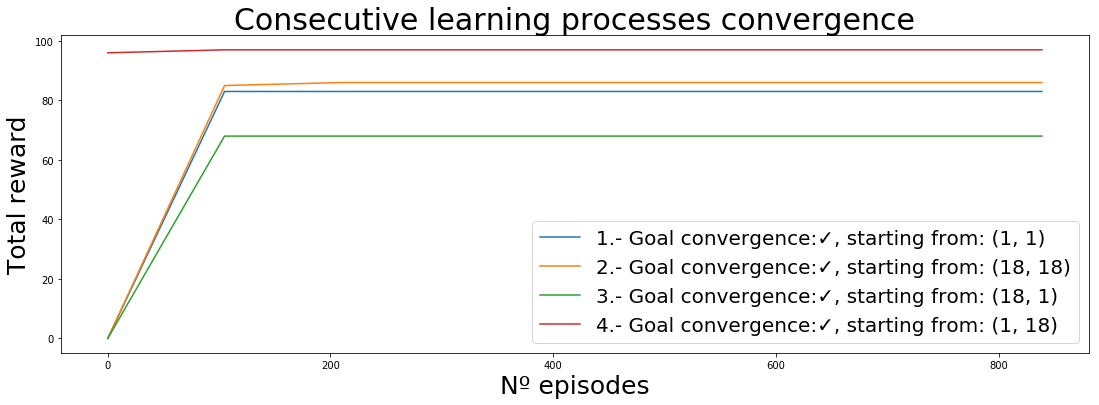

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.interpolate as interpolate

fig, ax = plt.subplots(figsize=(15,5))
fig.subplots_adjust(top=0.85)
fig.tight_layout()
n_e = list(range(n_episodes))
unicode = '\u2718'

for n,c in l.items():
    if c[0]:
        unicode = '\u2713'
    spl = interpolate.splrep(n_e, c[1])
    x2 = np.linspace(min(n_e), max(n_e), 9)
    y2 =  interpolate.splev(x2, spl)
    ax.plot(x2, y2, label=f'{n}.- Goal convergence:{unicode}, starting from: {distributed_positions[n-1]}')
    ax.legend(loc='best', prop={'size': 20})
    plt.title('Consecutive learning processes convergence',  fontsize=30)
    plt.xlabel('Nº episodes', fontsize=25)
    plt.ylabel('Total reward', fontsize=25)
    
plt.show()

Verify that the 'q_table' has been created by printing a partial sample of it. Remember: q_table = {State (param1, param2, ...) : [q1, q2, q3, q4, q5, q6, q7, q8], ...}. The number of entries in the 'q_table' should be equal to the number of states minus the obstacles.

In [8]:
print(f'# number of states - the obstacles = {len(e_greedy_maze.q_table.keys())}. See 3 first samples of those entries:')
dict(list(e_greedy_maze.q_table.items())[0:3])

# number of states - the obstacles = 304. See 3 first samples of those entries:


{State(grid, agent_pos=(1, 1)): array([74., 81., 83.]),
 State(grid, agent_pos=(2, 2)): array([80.99999122, 84.        , 73.99998873, 73.99951423, 81.99999997,
        83.99967029]),
 State(grid, agent_pos=(1, 3)): array([70.68213754, 74.82927648, 83.65282625, 85.        , 80.5417422 ])}

4.- Store the 'q-table' and its respective grid in the 'qlearning_files' folder, to enable the inference in further situations, without needing to loose time learning again. Verify that the folders are already created. Otherwise, create them manually.

In [9]:
str_id = 'id1'
qtable_file = './qlearning_files/pickles/'+str_id+'_qtable'
grid_file = './qlearning_files/grids/'+str_id+'_grid'
e_greedy_maze.convert_to_pickle(e_greedy_maze.q_table, qtable_file)
e_greedy_maze.convert_to_pickle(grid, grid_file)

5.- Now, those files should appear in the mentioned folders. Let's try a simulacrum of recovering the 'q-table'-grid pair from the pickle stored files.

In [10]:
str_id = 'id1'
qtable_file = './qlearning_files/pickles/'+str_id+'_qtable'
q_table = e_greedy_maze.extract_from_pickle(qtable_file)
grid_file = './qlearning_files/grids/'+str_id+'_grid'
grid = e_greedy_maze.extract_from_pickle(grid_file)

Verify its integrity by comparing it with the dictionary's head computed before:

In [11]:
dict(list(e_greedy_maze.q_table.items())[0:3])

{State(grid, agent_pos=(1, 1)): array([74., 81., 83.]),
 State(grid, agent_pos=(2, 2)): array([80.99999122, 84.        , 73.99998873, 73.99951423, 81.99999997,
        83.99967029]),
 State(grid, agent_pos=(1, 3)): array([70.68213754, 74.82927648, 83.65282625, 85.        , 80.5417422 ])}

Verify there are no unexplored states. That is, the following heating plot must not show any black cell, except the ones
containing an obstacle. Additionally, note that the clearer the colour is, the safest that zone is, and the darker the colour is, the more dangerous that zone is.

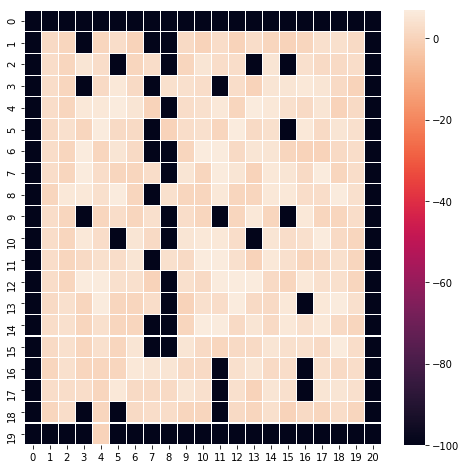

In [12]:
e_greedy_maze.visualize_max_quality_action (q_table, grid)

Have a look to the coherence of the resulted state quality values, according to their directions. Wherever you start, the arrows flow should guide you into the black circle (defined as goal in grid resources parameter) as if it were a draining gravity force. Squares are obstacles.

In [13]:
e_greedy_maze.q_value_ascii_action (q_table, grid)

▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇
▇ ↘ ← ▇ → ↙ ↓ ▇ ▇ ↘ ↓ ↘ ↓ ↙ ← ← ← ↙ ↙ ↙ ▇
▇ ↘ ↓ ↙ ↘ ▇ ↓ ↙ ▇ ↓ ↗ ↘ ↘ ▇ ↙ ▇ ↖ ← ← ↖ ▇
▇ ↘ ↓ ▇ → ↙ ← ▇ ↙ ↘ ↘ ▇ ↘ ↓ ↙ ↗ ↙ ↖ ← ↑ ▇
▇ ↘ ↓ ↙ ↙ ↙ ↙ ← ▇ ↘ ↘ ↙ ↓ ↙ ↙ ↖ ← ↖ ↑ ← ▇
▇ → ↘ ↓ ↙ ← ← ▇ → → ↘ ↓ ↙ ← ↖ ▇ ↙ ← ↖ ↙ ▇
▇ ↘ ↓ ↙ ↓ ↖ ← ▇ ▇ ↓ ↙ ↙ ← ↖ ↖ ← ↑ ↑ ← ↖ ▇
▇ ↘ ↓ ↙ → ↓ ↓ ↙ ▇ ↙ ↓ ↙ ↖ ↑ ↗ ↖ ← ↙ ↓ ↖ ▇
▇ ↓ ↙ ↙ ↘ ↙ ↓ ▇ ↙ ↓ ↓ ↙ ↓ ↓ ↙ ↙ → → ↙ ↙ ▇
▇ ↘ ↓ ▇ ↓ ↘ ↓ ↙ ▇ ↘ ↓ ▇ ↓ ↙ ↓ ▇ ↙ ↓ ↓ ↖ ▇
▇ ↘ ↓ ↙ ↘ ▇ ↙ ↘ ▇ ↙ ↙ ↙ ↘ ▇ ↙ ↘ ↘ ↙ ← ↓ ▇
▇ ↘ ↓ ← ↘ ↘ ↙ ▇ ↙ ← ↙ ↙ ↘ ↓ ↙ ↘ ↓ ← ↘ ↓ ▇
▇ ↘ ↓ ↙ ↙ ↘ ↘ ↓ ▇ ↖ ← ↙ ↙ ↙ ← ↓ ↙ ↘ ↘ ↓ ▇
▇ → ↘ ↓ ↙ ↓ ↓ ↙ ▇ ↑ ↘ → ↙ ← ← ↙ ▇ ↙ ↙ ↙ ▇
▇ ↘ ↘ ↓ ↘ ↓ ↓ ▇ ▇ ↓ ↙ ↙ ← ↖ ← ↙ ↖ ↙ ← ↓ ▇
▇ → ↘ ↓ ↘ ↓ ↙ ▇ ▇ ↙ ← ← ← ← ↖ ↖ ↖ ← ↙ ↖ ▇
▇ ↓ ↘ ↓ ↓ ↓ ↙ ↙ ↙ ← ← ▇ ↖ ↖ ← ↖ ▇ ↖ ← ↖ ▇
▇ ↘ → ↘ ↓ ↙ ← ← ← ↖ ↙ ▇ ↗ ↑ ↖ ↖ ▇ ↙ ↖ ↙ ▇
▇ → ↗ ▇ ↓ ▇ ↖ ↖ ↖ ← ← ▇ ↗ ← ↗ ↑ ↖ ← ↖ ← ▇
▇ ▇ ▇ ▇ ◉ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇ ▇


<h4>Part 2: Optimal solution inferring: </h4> Infer the best route and verify its suitability.

Try different start states from where to infer the optimal route. Logically, the correct path should reach the goal cell avoiding the dangers through the shortest number of states. Note that we first have to take back certain information to give to the QLearning class. The large info: grid and the 'q_table' are already recovered from the pickle file. The short info: grid resources can be easily remembered. Path symbol: '@'.

In [14]:
grid_resources = {'*': [-1, False], 'f': [-10, False],
                  'x': [100, True], 'obstacle':'o', 'goal': 'x'}
str_id = 'id1'
inference_state = State(grid=grid, agent_pos=(18,1))
e_greedy_maze = Qlearning(
    inference_state = inference_state,
    grid_resources = grid_resources )
e_greedy_maze.q_table = q_table
            
path, total_reward = e_greedy_maze.infer_path(n_episode_steps, inference_state)

e_greedy_maze.visualize_inferenced_path(path)

o o o o o o o o o o o o o o o o o o o o o
o * * o * * * o o * * * * @ @ @ * f * * o
o f * f * o f * o f * f @ o f o @ @ * * o
o * * o * * f o * * * o * @ f f * f * * o
o f * f f * f * o f * f f @ f * * f * * o
o * * * * * * o * f * * @ * f o f * f * o
o f f * * * * o o f f @ f * * * f * * * o
o f * f * * f * o * @ f f * f * f * f * o
o f * f f * * o * * @ f f * f f * f * * o
o * * o * * * * o * @ o * * * o * f * * o
o f * f * o * * o f @ f * o f * f * f * o
o f * f * * f o @ @ * f f * f f * f * * o
o f * f f * * @ o * * f f * f f * f * * o
o f * * * * * @ o f * * * * f * o * f * o
o f f * f * @ o o f f * f * * * f * * * o
o f * * f * @ o o * * * * * * f * f * * o
o * f * * @ * * * * f o f * * * o * f * o
o * f * * @ * * * * f o f * * * o * f * o
o f * o @ o * * * * * o * * * f * f * * o
o o o o @ o o o o o o o o o o o o o o o o








_// That's it. If you found this useful, remember that you can 'like' this project by giving me a star on its Github repo._